In [1]:
import numpy as np
import pandas as pd
from tflearn.data_utils import build_hdf5_image_dataset
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.misc import imresize
from PIL import ImageEnhance
import os
import glob
from joblib import Parallel, delayed
import SimpleITK as sitk
from sklearn.cross_validation  import train_test_split
from PIL import Image
from scipy.misc import imread
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation
import tflearn
import tensorflow as tf

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


C:\Users\User\Anaconda3\envs\tensorflow1\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
annotations = pd.read_csv('annotations.csv')
candidates = pd.read_csv('candidates.csv')

In [3]:
class CTScan(object):
    def __init__(self, filename = None, coords = None):
        self.filename = filename
        self.coords = coords
        self.ds = None
        self.image = None
    def reset_coords(self, coords):
        self.coords = coords

    def read_mhd_image(self):
        path = glob.glob('./subset0/' + self.filename +'.mhd')
        self.ds = sitk.ReadImage(path[0])
        self.image = sitk.GetArrayFromImage(self.ds)


    def get_voxel_coords(self):
        origin = self.ds.GetOrigin()
        resolution = self.ds.GetSpacing()
        voxel_coords = [np.absolute(self.coords[j]-origin[j])/resolution[j] \
            for j in range(len(self.coords))]
        return tuple(voxel_coords)
    
    def get_image(self):
        return self.image
    
    def get_subimage(self, width):
        self.read_mhd_image()
        x, y, z = self.get_voxel_coords()
        subImage = self.image[int(z), int(y-width/2):int(y+width/2), int(x-width/2):int(x+width/2)]
        return subImage   
    
    def normalizePlanes(self, npzarray):
        maxHU = 400.
        minHU = -1000.
        npzarray = (npzarray - minHU) / (maxHU - minHU)
        npzarray[npzarray>1] = 1.
        npzarray[npzarray<0] = 0.
        return npzarray
    
    def save_image(self, filename, width):
        image = self.get_subimage(width)
        image = self.normalizePlanes(image)
        Image.fromarray(image*255).convert('L').save(filename)

In [4]:
positives = candidates[candidates['class']==1].index  
negatives = candidates[candidates['class']==0].index

In [5]:
positives

Int64Index([ 1387,  2033,  3250,  5029,  5803,  6141,  6808,  7584,  7591,
             7905,
            ...
            52844, 52945, 53110, 53775, 55694, 55774, 55921, 56165, 56315,
            56388],
           dtype='int64', length=122)

In [6]:
negatives

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            56906, 56907, 56908, 56909, 56910, 56911, 56912, 56913, 56914,
            56915],
           dtype='int64', length=56794)

In [7]:
np.random.seed(42)
negIndexes = np.random.choice(negatives, len(positives)*5, replace = False)

candidatesDf = candidates.iloc[list(positives)+list(negIndexes)]

X = candidatesDf.iloc[:,:-1]
y = candidatesDf.iloc[:,-1]

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
X_train.to_pickle('traindata')
y_train.to_pickle('trainlabels')
X_test.to_pickle('testdata')
y_test.to_pickle('testlabels')

In [9]:
def create_data(idx, outDir, data,  width = 50):
    '''
    Generates your test, train, validation images
    outDir = a string representing destination
    width (int) specify image size
    '''
    scan = CTScan(np.asarray(data.loc[idx])[0], \
              np.asarray(data.loc[idx])[1:])
    outfile = outDir  +  str(idx)+ '.jpg'
    scan.save_image(outfile, width)

In [10]:
inpfile =  'traindata'
outDir = 'train/image_'
inpfile2 =  'testdata'
outDir2 = 'test/image_'
X_data2=pd.read_pickle(inpfile2)
X_data = pd.read_pickle(inpfile)


In [521]:
Parallel(n_jobs = 4)(delayed(create_data)(idx, outDir, X_data) for idx in X_data.index)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [528]:
Parallel(n_jobs = 4)(delayed(create_data)(idx2, outDir2, X_data2) for idx2 in X_data2.index)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

C:\Users\User\Anaconda3\envs\tensorflow1\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
C:\Users\User\Anaconda3\envs\tensorflow1\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if sys.path[0] == '':


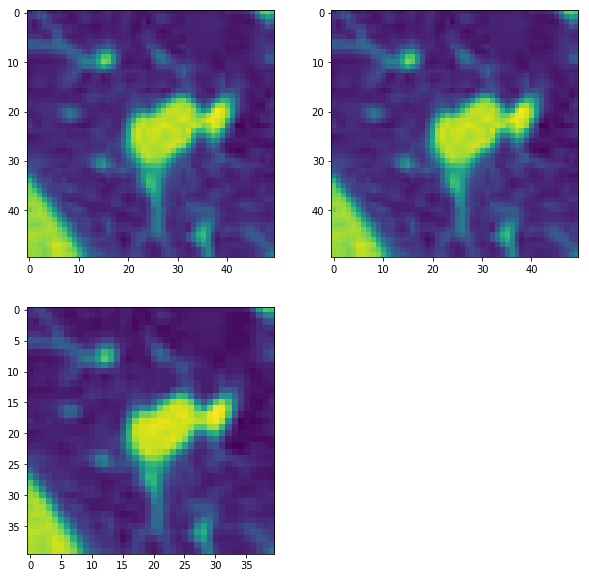

In [45]:
from scipy.misc import imresize
from PIL import ImageEnhance
dirName = './train/'
plt.figure(figsize = (10,10))
inp = imread(dirName + 'image_'+ str(13655) + '.jpg')
plt.subplot(221)
plt.imshow(inp)
plt.grid(False)

Pp = PreProcessing(inp)

inp2 = Pp.subtract_mean()
plt.subplot(222)
plt.imshow(inp2)
plt.grid(False)

#inp4 = Pp.enhance_contrast()
#plt.subplot(224)
#plt.imshow(inp4)
#plt.grid(False)

inp3 = Pp.downsample_data()
plt.subplot(223)
plt.imshow(inp3)
plt.grid(False)

#inp4 = Pp.enhance_contrast()
#plt.subplot(224)
#plt.imshow(inp4)
#plt.grid(False)

In [11]:


class PreProcessing(object):
    def __init__(self, image = None):
        self.image = image
    
    def subtract_mean(self):
        self.image = (self.image/255.0 - 0.25)*255
        return self.image
    
    def downsample_data(self):
        self.image = imresize(self.image, size = (40, 40), interp='bilinear', mode='L')
        return self.image
    
    def enhance_contrast(self):
        self.image = ImageEnhance.Contrast(self.image)
        return self.image

In [46]:
train_filenames =X_data.index.to_series().apply(lambda x:'./train/image_'+str(x)+'.jpg')

In [47]:
train_filenames

16222    ./train/image_16222.jpg
27142    ./train/image_27142.jpg
49331    ./train/image_49331.jpg
28973    ./train/image_28973.jpg
28506    ./train/image_28506.jpg
27383    ./train/image_27383.jpg
15246    ./train/image_15246.jpg
6808      ./train/image_6808.jpg
40473    ./train/image_40473.jpg
49915    ./train/image_49915.jpg
7692      ./train/image_7692.jpg
41085    ./train/image_41085.jpg
39525    ./train/image_39525.jpg
39287    ./train/image_39287.jpg
40387    ./train/image_40387.jpg
26379    ./train/image_26379.jpg
50285    ./train/image_50285.jpg
20248    ./train/image_20248.jpg
51807    ./train/image_51807.jpg
27149    ./train/image_27149.jpg
27096    ./train/image_27096.jpg
42884    ./train/image_42884.jpg
7830      ./train/image_7830.jpg
44681    ./train/image_44681.jpg
36122    ./train/image_36122.jpg
13442    ./train/image_13442.jpg
48982    ./train/image_48982.jpg
20117    ./train/image_20117.jpg
6431      ./train/image_6431.jpg
4035      ./train/image_4035.jpg
          

In [40]:
dt

0      image_10003
1       image_1003
2      image_10037
3       image_1005
4      image_10151
5      image_10256
6      image_10324
7      image_10423
8      image_10491
9      image_10612
10     image_10692
11     image_10705
12     image_10749
13     image_10751
14     image_10934
15     image_11003
16     image_11113
17     image_11208
18      image_1126
19      image_1182
20     image_12018
21     image_12055
22     image_12129
23     image_12303
24     image_12451
25     image_12454
26     image_12506
27     image_12552
28     image_12774
29     image_12802
          ...     
555     image_8013
556     image_8098
557     image_8156
558     image_8192
559     image_8206
560     image_8246
561     image_8267
562     image_8357
563     image_8401
564     image_8465
565     image_8466
566     image_8495
567     image_8497
568     image_8670
569     image_8761
570      image_890
571     image_8909
572     image_8955
573     image_8959
574     image_9040
575     image_9135
576      ima

In [61]:

dataset_file = 'traindatalabels.txt'
   
filenames = train_filenames.values.astype(str)
labels = y_train.values.astype(int)
traindata = np.zeros(filenames.size,\
                     dtype=[('var1', 'S36'), ('var2', int)])
traindata['var1'] = filenames
traindata['var2'] = labels

np.savetxt(dataset_file, traindata, fmt="%10s %d")

In [62]:
filenames

array(['./train/image_16222.jpg', './train/image_27142.jpg',
       './train/image_49331.jpg', './train/image_28973.jpg',
       './train/image_28506.jpg', './train/image_27383.jpg',
       './train/image_15246.jpg', './train/image_6808.jpg',
       './train/image_40473.jpg', './train/image_49915.jpg',
       './train/image_7692.jpg', './train/image_41085.jpg',
       './train/image_39525.jpg', './train/image_39287.jpg',
       './train/image_40387.jpg', './train/image_26379.jpg',
       './train/image_50285.jpg', './train/image_20248.jpg',
       './train/image_51807.jpg', './train/image_27149.jpg',
       './train/image_27096.jpg', './train/image_42884.jpg',
       './train/image_7830.jpg', './train/image_44681.jpg',
       './train/image_36122.jpg', './train/image_13442.jpg',
       './train/image_48982.jpg', './train/image_20117.jpg',
       './train/image_6431.jpg', './train/image_4035.jpg',
       './train/image_3791.jpg', './train/image_52336.jpg',
       './train/image_42123.jp

In [63]:
build_hdf5_image_dataset(dataset_file, image_shape=(50, 50), mode='file', output_path='traindataset4.h5', categorical_labels=True, normalize=True)

In [14]:
# Load HDF5 dataset
import h5py
h5f = h5py.File('traindataset4.h5', 'r')
X_train_images = h5f['X']
Y_train_labels = h5f['Y']
X_train_images

<HDF5 dataset "X": shape (585, 50, 50, 3), type "<f4">

In [13]:
h5f.close()


In [15]:
Y_train_labels

<HDF5 dataset "Y": shape (585, 2), type "<f4">

In [16]:
img_prep = ImagePreprocessing()
img_prep.add_featurewise_zero_center()
img_prep.add_featurewise_stdnorm()

In [17]:
img_aug = ImageAugmentation()
img_aug.add_random_flip_leftright()
img_aug.add_random_rotation(max_angle=25.)
img_aug.add_random_blur(sigma_max=3.)

In [18]:
network = input_data(shape=[None, 50, 50, 3],
                     data_preprocessing=img_prep,
                     data_augmentation=img_aug)

In [19]:
network = conv_2d(network, 50, 3, activation='relu')
network = max_pool_2d(network, 2)
network = conv_2d(network, 64, 3, activation='relu')
network = conv_2d(network, 64, 3, activation='relu')
network = max_pool_2d(network, 2)
network = fully_connected(network, 512, activation='relu')
network = dropout(network, 0.5)
network = fully_connected(network, 2, activation='softmax')
network = regression(network, optimizer='adam',
                     loss='categorical_crossentropy',
                     learning_rate=0.001)





Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.


In [20]:
model = tflearn.DNN(network, tensorboard_verbose=0, checkpoint_path='nodule-classifier.tfl.ckpt')

# Train it! We'll do 100 training passes and monitor it as it goes.
model.fit(X_train_images, Y_train_labels, n_epoch=100, shuffle=True,show_metric=True, batch_size=96,snapshot_epoch=True)

# Save model when training is complete to a file
model.save("nodule-classifier.tfl")

Training Step: 699  | total loss: 0.03625 | time: 6.022s
| Adam | epoch: 100 | loss: 0.03625 - acc: 0.9868 -- iter: 576/585
Training Step: 700  | total loss: 0.03593 | time: 7.415s
| Adam | epoch: 100 | loss: 0.03593 - acc: 0.9860 -- iter: 585/585
--
INFO:tensorflow:C:\Users\User\nodule-classifier.tfl.ckpt-700 is not in all_model_checkpoint_paths. Manually adding it.
INFO:tensorflow:C:\Users\User\nodule-classifier.tfl is not in all_model_checkpoint_paths. Manually adding it.


In [21]:
test_filenames =X_test.index.to_series().apply(lambda x:'./test/image_'+str(x)+'.jpg')

In [22]:
tdataset_file = 'testdatalabels.txt'
   
tfilenames = test_filenames.values.astype(str)
tlabels = y_test.values.astype(int)
testdata = np.zeros(tfilenames.size,\
                     dtype=[('var1', 'S36'), ('var2', int)])
testdata['var1'] = tfilenames
testdata['var2'] = tlabels

np.savetxt(tdataset_file, testdata, fmt="%10s %d")

In [23]:
build_hdf5_image_dataset(tdataset_file, image_shape=(50, 50), mode='file', output_path='testdata1.h5', categorical_labels=True, normalize=True)

In [24]:
hf2 = h5py.File('testdata1.h5', 'r')
X_test_images = hf2['X']
Y_test_labels = hf2['Y']

In [39]:
Y=Y_test_labels[:]

In [27]:
 predict=model.predict(X_test_images[:,:,:,:])

In [26]:
score = model.evaluate(X_test_images, Y_test_labels)
score

[0.870748297292359]